# Labs | Unit 4 

[Lab | Cleaning numerical data](#0)

[Lab | Cleaning categorical data](#1)

[Lab | Feature extraction](#2)

[Lab | Data cleaning and wrangling](#3)

[Lab | Comparing regression models](#4)

<a id='0'></a>

# Lab | Cleaning numerical data

##### 1. Import the necessary libraries.

In [1]:
# Base libraries
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import BASE_COLORS

%matplotlib inline

#warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

##### 2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.

In [2]:
customer_df = pd.read_csv("data/we_fn_use_c_marketing_customer_value_analysis.csv")

##### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

##### 4. Rename the columns so they follow the PE8 (snake case) 
https://www.python.org/dev/peps/pep-0008/ \
PE8 -- Style Guide for Python Code 

In [6]:
#change column names
new_cols = [col.replace(" ", "_").lower() for col in customer_df]
customer_df.columns = new_cols

##### 5. Change effective to date column to datetime format.

In [7]:
# date column to datetime format
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

##### 6. Check NaN values per column.

In [8]:
#Check NaNs Total
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [9]:
# Check NaNs (Percentage)
customer_df.isna().sum()/len(customer_df)

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

No NaNs? Check data

In [10]:
customer_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [11]:
# Income variable first quartil == min. Too many zeros. 
customer_df['income'].value_counts()
#Length: n. of unique values

0        2317
95697      12
40864       7
24910       7
25965       7
         ... 
26952       1
84300       1
22862       1
20815       1
57240       1
Name: income, Length: 5694, dtype: int64

In [12]:
#replace zeros with median
median_income=customer_df['income'].median(skipna=True)
customer_df['income']=customer_df.income.mask(customer_df.income==0,median_income)

In [13]:
customer_df['income'].value_counts()

33889.5    2317
95697.0      12
20978.0       7
40864.0       7
61108.0       7
           ... 
18779.0       1
61085.0       1
25074.0       1
49057.0       1
18944.0       1
Name: income, Length: 5694, dtype: int64

##### 7. Store continuous data into a continuous variable and do the same for discrete and categorical. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

Check discrete and continuous variables

Only numerical variables can be discrete or continuous

In [14]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274.0,69,32,5,0,1,384.811147
1,6979.535903,33889.5,94,13,42,0,8,1131.464935
2,12887.431650,48767.0,108,18,38,0,2,566.472247
3,7645.861827,33889.5,106,18,65,0,7,529.881344
4,2813.692575,43836.0,73,12,44,0,1,138.130879


In [15]:
#the discrete variables will be likely the ones with less unique values
numericals.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [16]:
discrete = [i for i in numericals if (len(numericals[i].unique()) < (numericals.shape[0] * 0.01))]

In [17]:
discrete

['months_since_last_claim', 'number_of_open_complaints', 'number_of_policies']

In [18]:
continuous = list(numericals.drop(columns = discrete).columns)

In [19]:
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [20]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


##### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

The categorical values that are not the IDs

In [21]:
categorical = customer_df.select_dtypes(object)

In [22]:
categorical.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [23]:
categorical_columns = [i for i in categorical if (len(categorical[i].unique()) < (numericals.shape[0] * 0.01))]

In [24]:
#no customer_id anymore
categorical_columns

['state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

In [25]:
categorical_df=customer_df[categorical_columns]

##### 9. Get categorical features.

In [26]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


<a id='1'></a>

## Lab | Cleaning categorical data

##### 1. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [27]:
continuous_df = numericals.drop(columns = discrete)

In [28]:
continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_policy_inception,total_claim_amount
0,2763.519279,56274.0,69,5,384.811147
1,6979.535903,33889.5,94,42,1131.464935
2,12887.431650,48767.0,108,38,566.472247
3,7645.861827,33889.5,106,65,529.881344
4,2813.692575,43836.0,73,44,138.130879


In [29]:
discrete_df = numericals[discrete]

In [30]:
discrete_df

,months_since_last_claim,number_of_open_complaints,number_of_policies
0,32,0,1
1,13,0,8
2,18,0,2
3,18,0,7
4,12,0,1
...,...,...,...
9129,18,0,2
9130,14,0,1
9131,9,3,2
9132,34,0,3


##### 2. Plot a correlation matrix, what can you see?

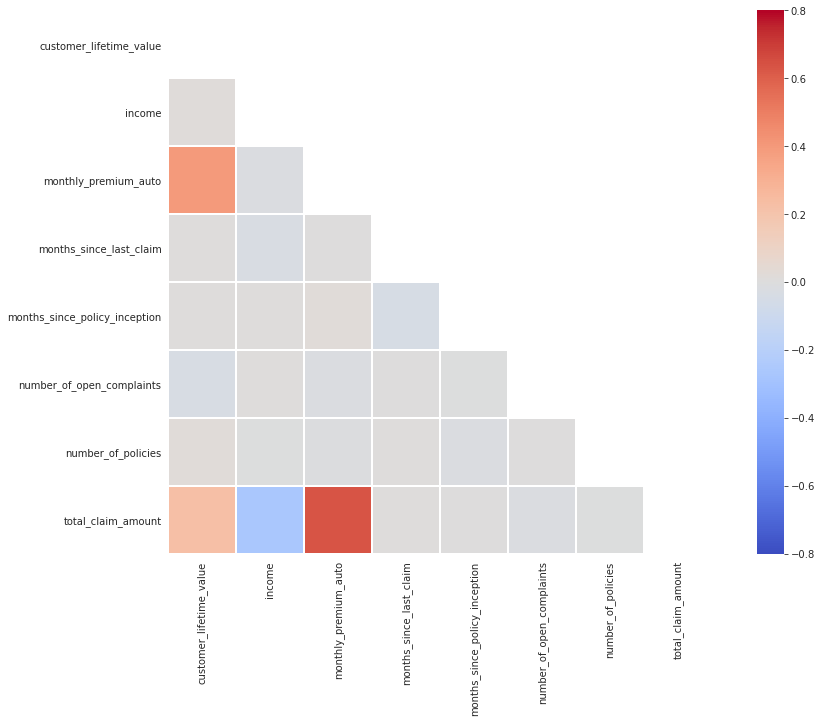

In [31]:
mask = np.zeros_like(numericals.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(numericals.corr(), mask=mask,
                     square=True, linewidths=1, cmap="coolwarm",
                     vmax = 0.8, vmin = -0.8)

### Discrete

##### 3. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [32]:
# Create function to print barplots from discrete data

def df_bar(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.barplot(x = df[col].value_counts().index, y = df[col].value_counts())
        
    plt.show()

#The enumerate() method adds counter to an iterable and returns it (the enumerate object).

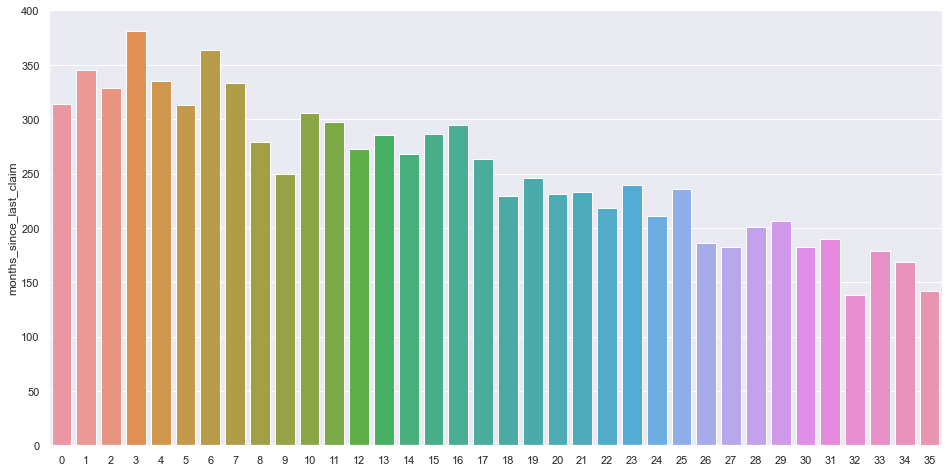

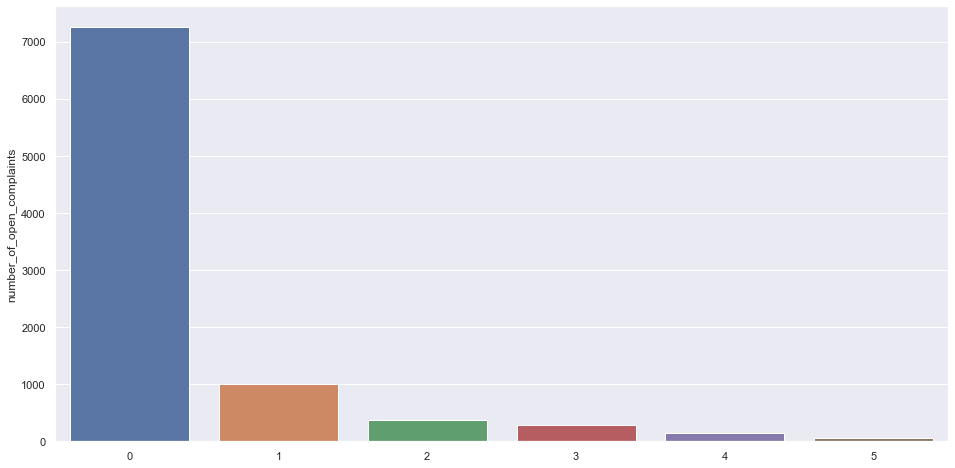

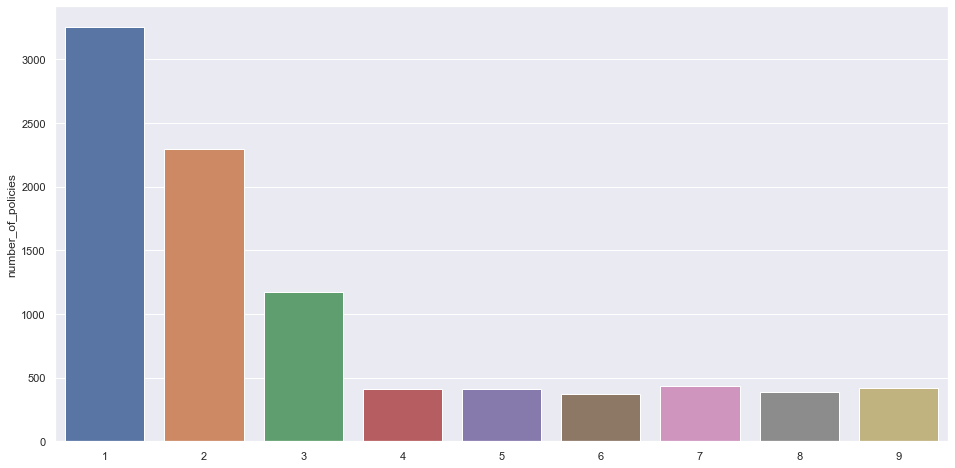

In [33]:
df_bar(discrete_df)

### Continuous

In [34]:
def df_hist(df):
    sns.set(rc={'figure.figsize':(16,8)})
    for i, col in enumerate(df):
        plt.figure(i)
        sns.distplot(df[col], color = list(BASE_COLORS.keys())[i])
        
    plt.show()

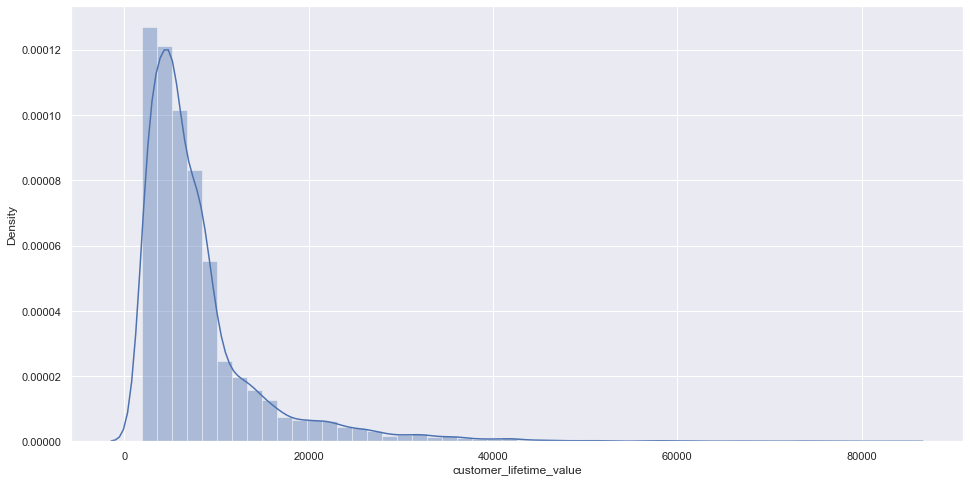

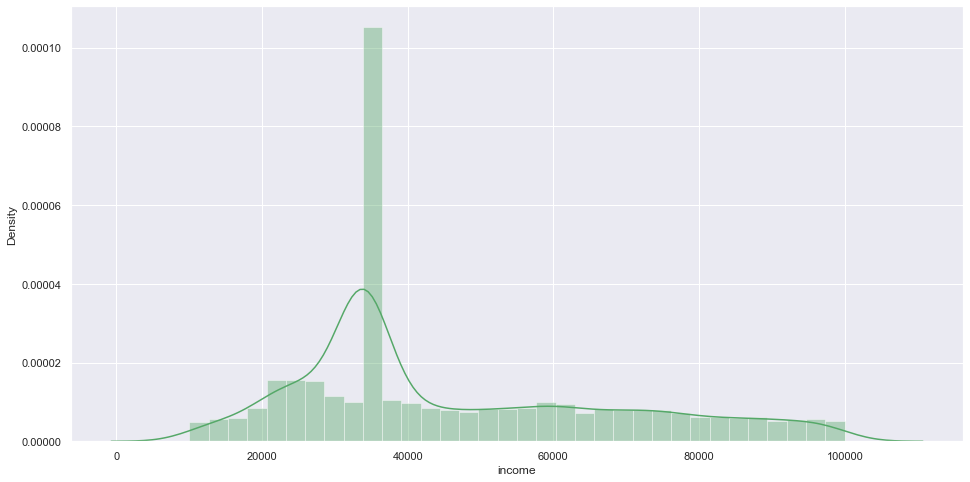

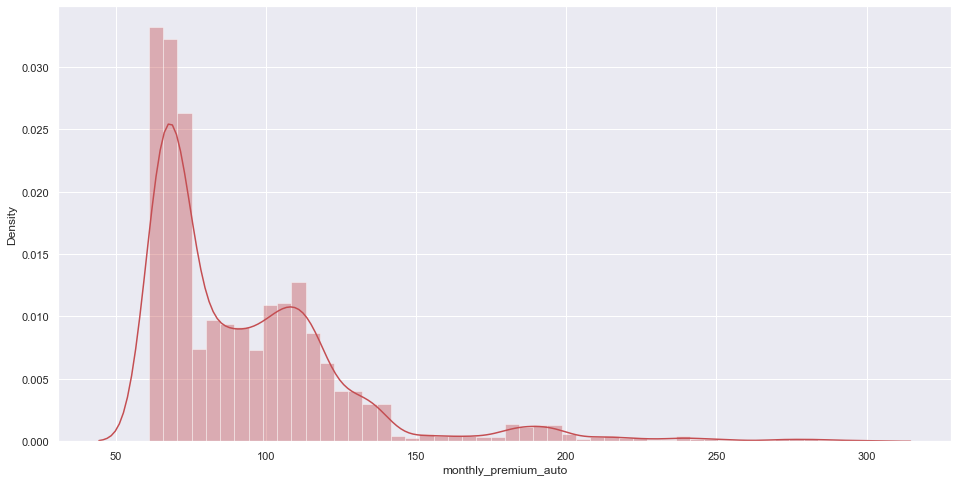

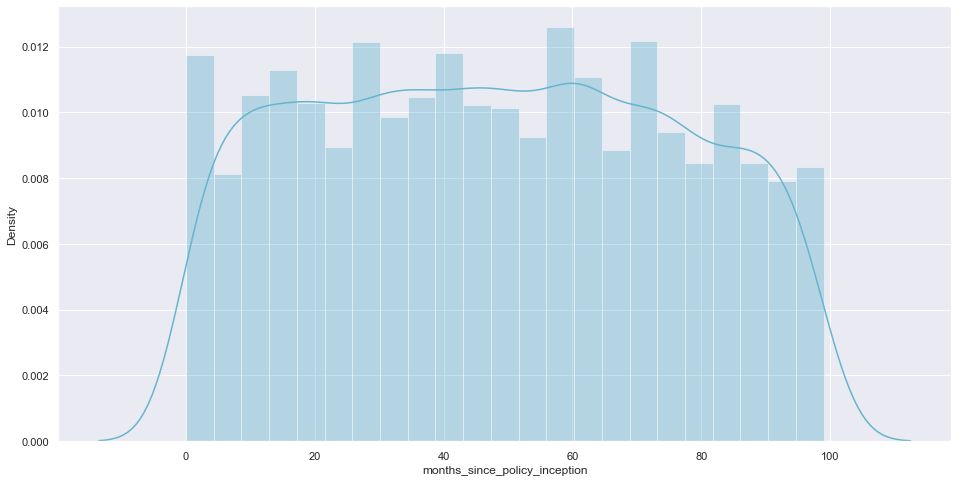

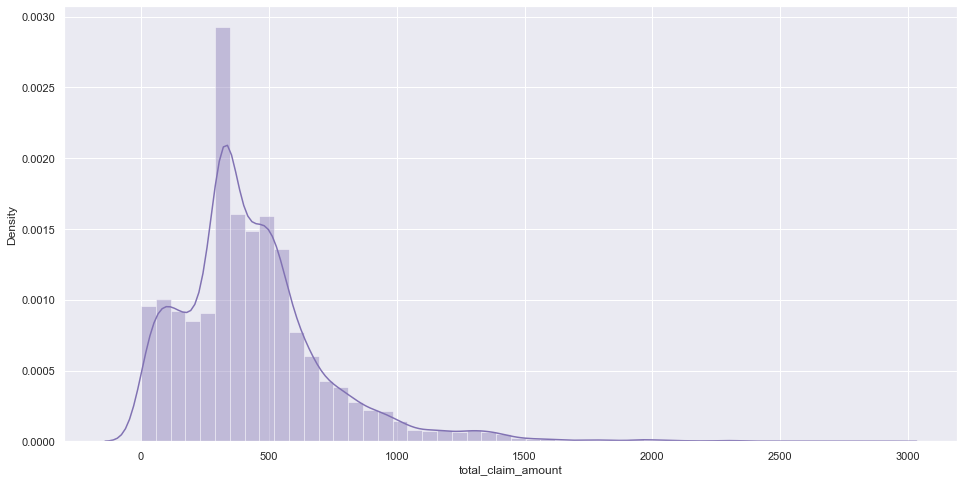

In [35]:
df_hist(continuous_df)

###### 5. Only total claim amount (target), income and customer lifetime look like continous variables. better check more in depth what's happening there:

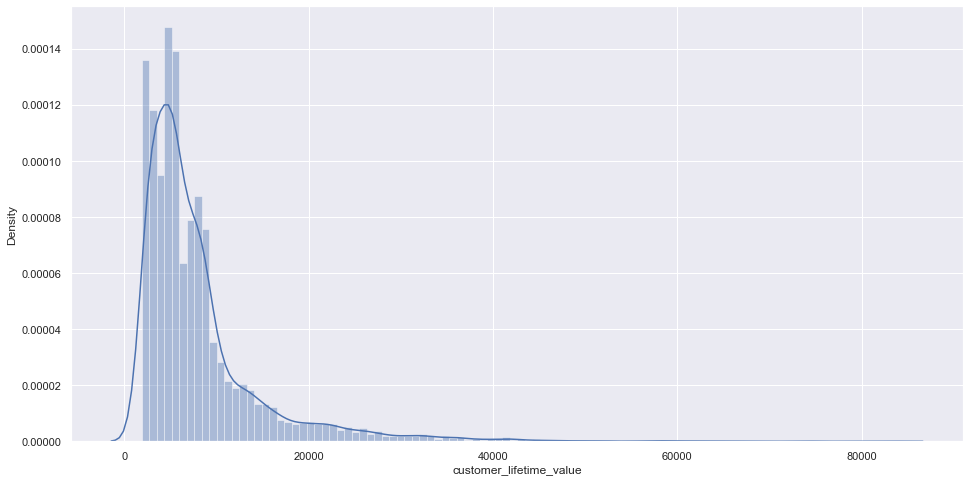

In [36]:
sns.distplot(continuous_df["customer_lifetime_value"], bins = 100);

In [37]:
continuous_df["customer_lifetime_value"].value_counts()

2300.691547     6
6057.072080     6
6005.214792     6
8819.018934     6
4984.618655     6
               ..
12206.892080    1
3728.830130     1
2456.816647     1
2675.029491     1
4491.909095     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

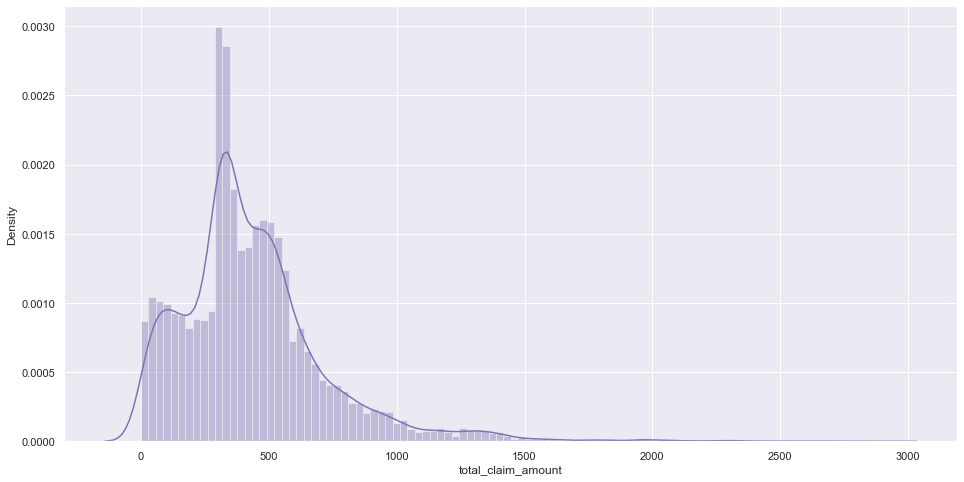

In [38]:
sns.distplot(continuous_df["total_claim_amount"], bins = 100, color = list(BASE_COLORS.keys())[4]);

In [39]:
continuous_df["total_claim_amount"].value_counts()

316.800000    116
292.800000    110
312.000000    108
350.400000    105
331.200000    102
             ... 
212.009825      1
314.880326      1
707.925645      1
246.993145      1
204.620759      1
Name: total_claim_amount, Length: 5106, dtype: int64

Distribution looks fine, probably no nans were replaced.

##### 6. Look for outliers in the continuous variables we have found. Hint: There is a good plot to do that.

In [40]:
continuous[:3]

['customer_lifetime_value', 'income', 'monthly_premium_auto']

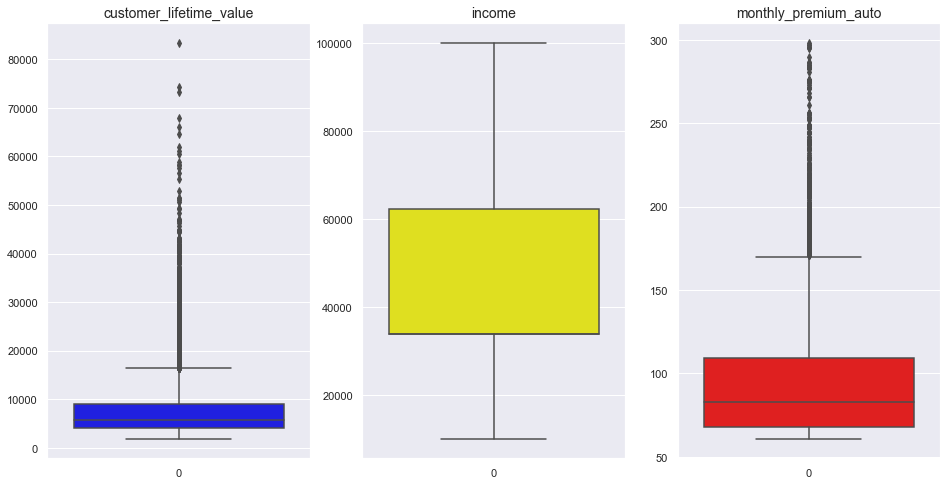

In [41]:
box_colors = ["blue", "yellow", "red"]

f, ax = plt.subplots(1, 3, figsize=(16,8))


for i, col in enumerate(continuous[:3]):
    sns.boxplot(data = continuous_df[col], ax = ax[i], color = box_colors[i])
    ax[i].set_title(col, fontsize = 14)
plt.show();

Many outliers in customer lifetime vaulue and monthly_premium_auto

<a id='2'></a>

# Lab | Feature extraction

In [42]:
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


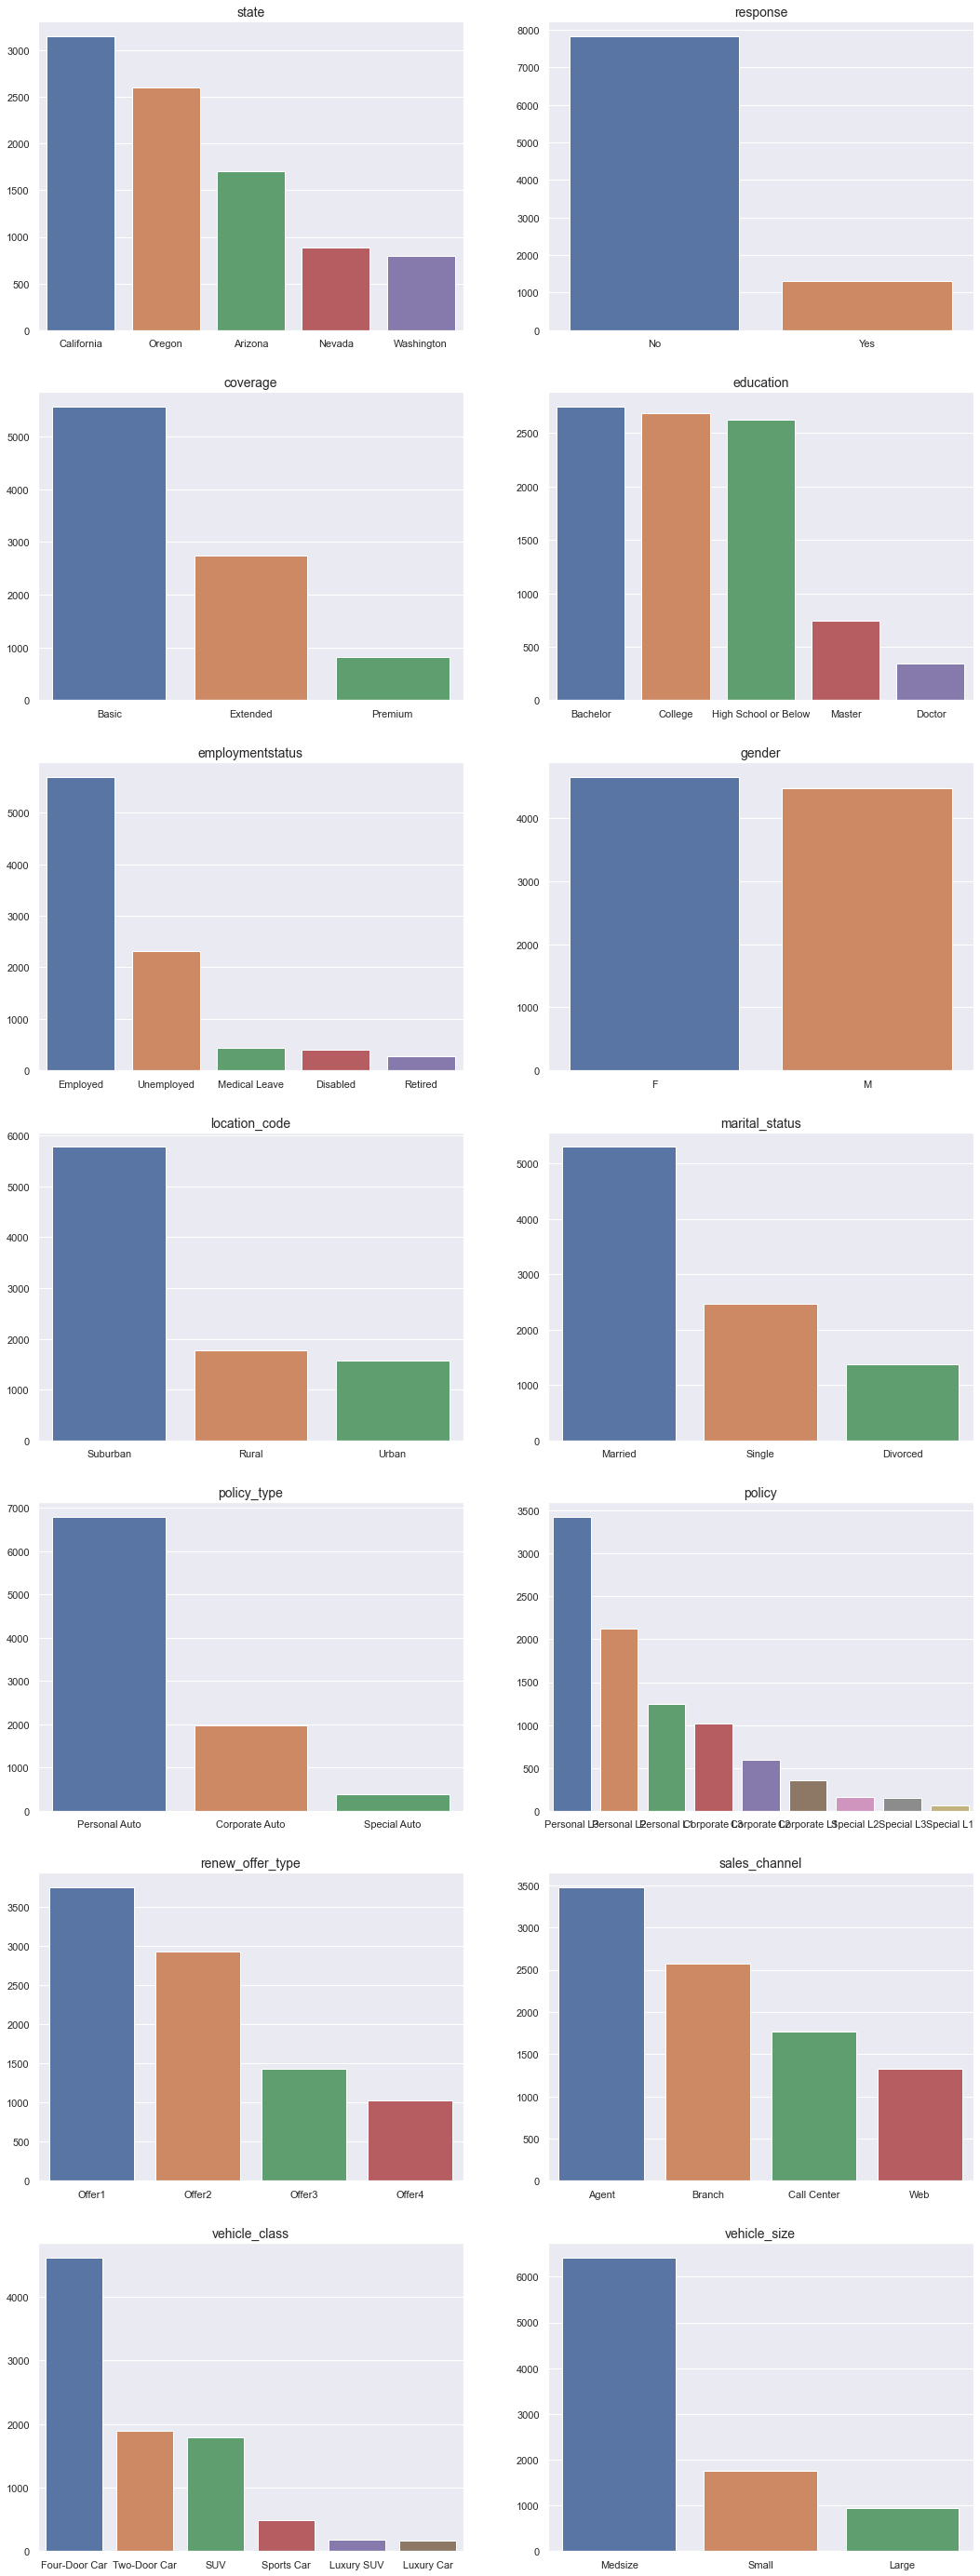

In [43]:
f, axes = plt.subplots(int(categorical_df.shape[1] / 2), 2, figsize=(18, 50))

for i, col in enumerate(categorical_df):

    sns.barplot(x = categorical_df[col].value_counts().index,
                y = categorical_df[col].value_counts(),
                ax=axes[int(i / 2)][int(i) % 2])  
    axes[int(i / 2)][int(i) % 2].set_title(col, fontsize = 14)
    axes[int(i / 2)][int(i) % 2].set_ylabel("")

plt.show()

# Conclusions:

Education, employment status, policy and vehicle class are somewhat unbalanced. \
For education we could turn it into a binary variable (college +-), but i wouldnt touch it. \
Policy is redundant, may be we can classify it in L1, L2 and L3 groups Id concatenate luxury suv, sports car and luxury car into luxury or among the other classes. \
For employment we could divide them among employed, unemployed and inactive. \
We can see that having open complains isn't that common so we can turn it into a binary variable, open not open \
For the number of policies we could join use 1, 2, 3, 4+

In [44]:
# Check policy 
L = categorical["policy"].apply(lambda x: x[-2:])
policy = categorical["policy"].apply(lambda x: x[:-2])

In [45]:
policy.value_counts()

Personal      6788
Corporate     1968
Special        378
Name: policy, dtype: int64

In [46]:
# L looks like an independent variable
L.value_counts()

L3    4588
L2    2881
L1    1665
Name: policy, dtype: int64

In [47]:
categorical["coverage"].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

In [48]:
categorical["marital_status"].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

In [49]:
categorical["policy_type"].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

As we thought at first this was kind of redundant, we will have to deal with it later on.

## Time (Bonus Challenge)

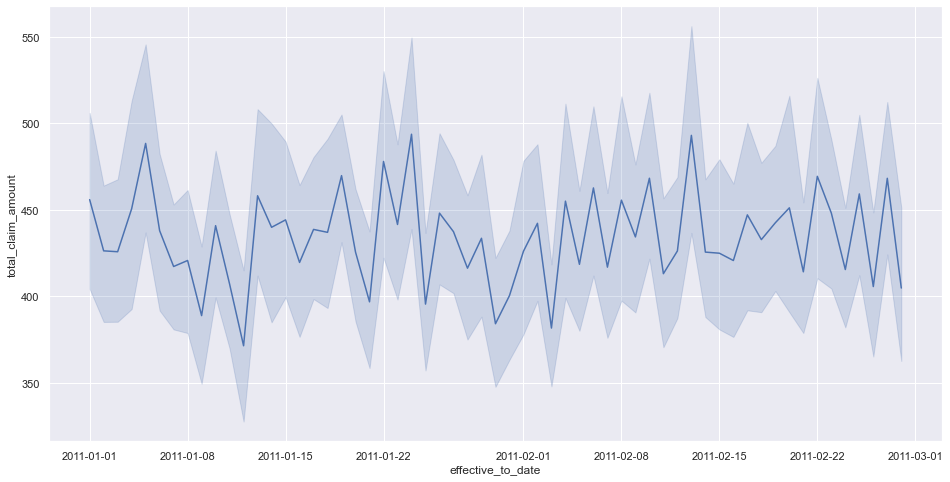

In [50]:
sns.lineplot(x="effective_to_date", y="total_claim_amount", data = customer_df);

In [51]:
# Cant see clear pattern

In [52]:
time_df = pd.DataFrame()
time_df["day"] = customer_df["effective_to_date"].dt.day
time_df["week"] = customer_df["effective_to_date"].dt.week
time_df["month"] = customer_df["effective_to_date"].dt.month
time_df["target"] = customer_df["total_claim_amount"]

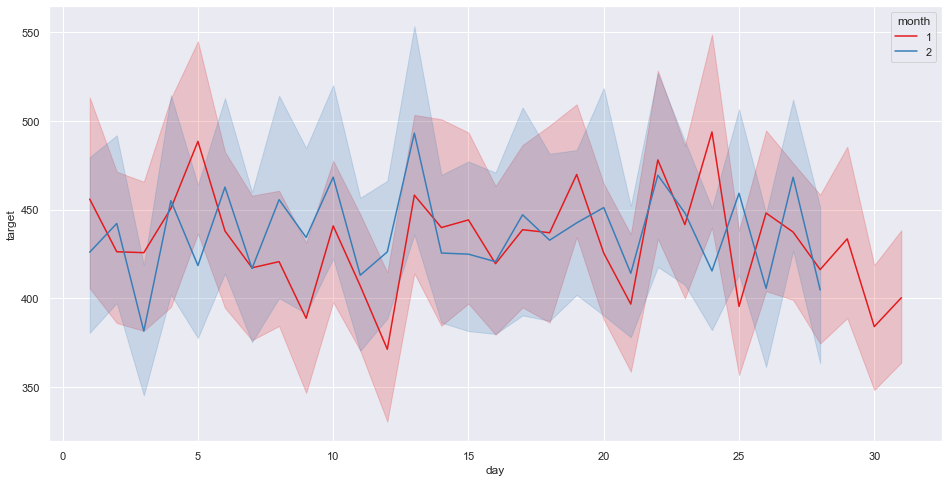

In [53]:
sns.lineplot(x = time_df.day, y=time_df.target, hue = time_df.month, palette="Set1");

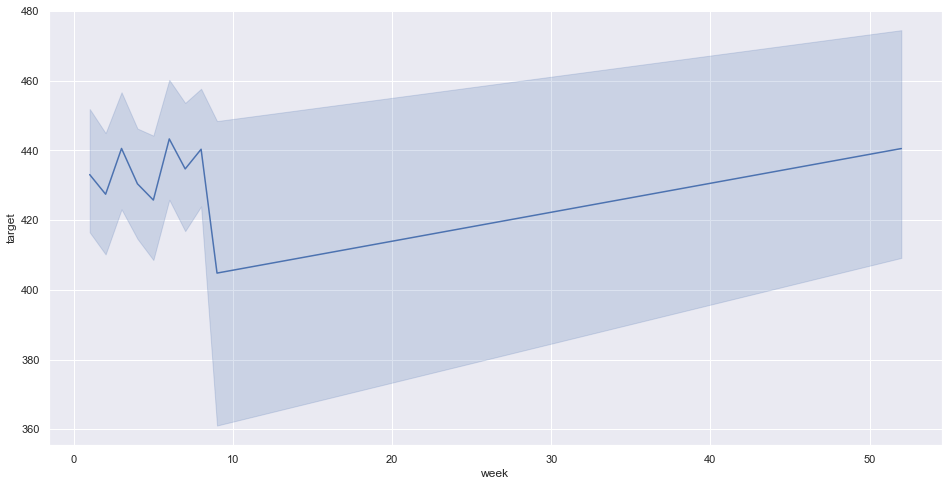

In [54]:
# Still not clear, check weeks
sns.lineplot(x = time_df.week, y = time_df.target);

In [55]:
# Error here
time_df.week.value_counts()

4     1147
3     1137
5     1105
2     1079
8     1073
1     1049
7     1040
6     1035
52     308
9      161
Name: week, dtype: int64

In [56]:
# Looks like first week
customer_df.effective_to_date.loc[customer_df.effective_to_date.dt.week[customer_df.effective_to_date.dt.week == 52].index]

47     2011-01-02
60     2011-01-02
87     2011-01-01
133    2011-01-02
205    2011-01-02
          ...    
9041   2011-01-02
9063   2011-01-01
9085   2011-01-01
9091   2011-01-02
9103   2011-01-01
Name: effective_to_date, Length: 308, dtype: datetime64[ns]

In [57]:
# Yes it is, change 52 to 0
customer_df.effective_to_date.loc[customer_df.effective_to_date.dt.week[customer_df.effective_to_date.dt.week == 1].index]

11     2011-01-06
17     2011-01-05
36     2011-01-08
69     2011-01-09
106    2011-01-04
          ...    
9090   2011-01-07
9104   2011-01-09
9113   2011-01-06
9126   2011-01-09
9128   2011-01-06
Name: effective_to_date, Length: 1049, dtype: datetime64[ns]

In [58]:
time_df.week = time_df.week.apply(lambda x: 0 if x == 52 else x)

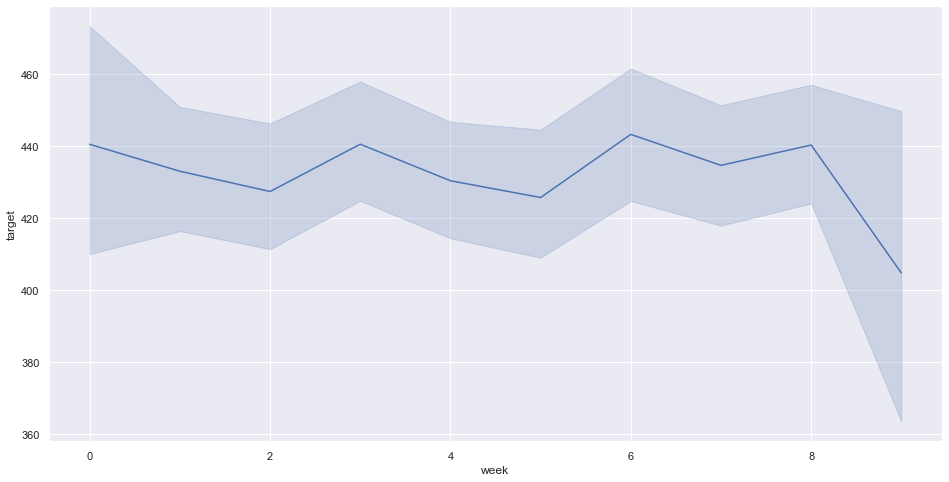

In [59]:
sns.lineplot(x = time_df.week, y = time_df.target);

Much better Isnt very clear if it's relevant but will keep it 

<a id='3'></a>

# Lab | Data cleaning and wrangling

In [60]:
# No NaNs so just remove outliers (normalization method)
def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean()) / column.var() ** (1/2))) > threshold]
    return data

In [61]:
CLV_outliers = outliers(customer_df["customer_lifetime_value"])
MPA_outliers = outliers(customer_df["monthly_premium_auto"])

In [62]:
to_drop = CLV_outliers.index | MPA_outliers.index # Union

In [63]:
clean_customer_df = customer_df.drop(to_drop).reset_index(drop = True)
clean_customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274.0,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,33889.5,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767.0,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,33889.5,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836.0,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941.0,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
8749,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604.0,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8750,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,33889.5,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8751,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941.0,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


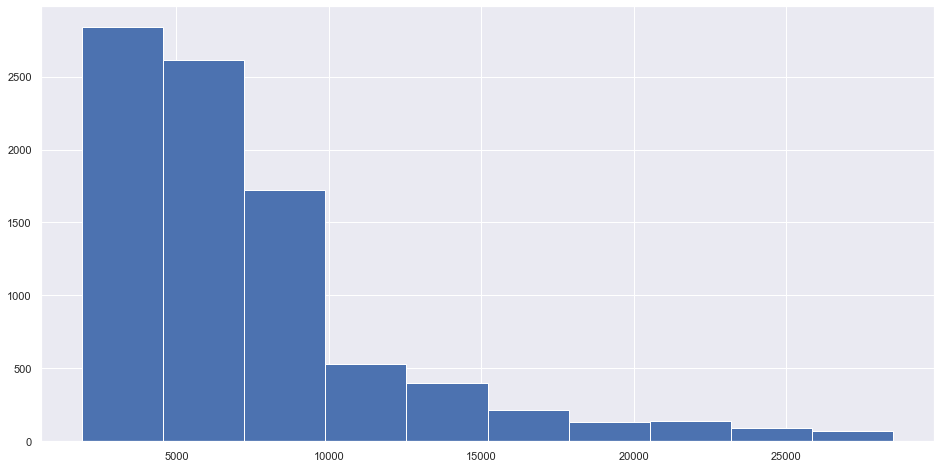

In [64]:
# Much better
clean_customer_df["customer_lifetime_value"].hist();

# Data wrangling

In [65]:
# Create copy
df_copy = clean_customer_df.copy()

In [66]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       8753 non-null   object        
 1   state                          8753 non-null   object        
 2   customer_lifetime_value        8753 non-null   float64       
 3   response                       8753 non-null   object        
 4   coverage                       8753 non-null   object        
 5   education                      8753 non-null   object        
 6   effective_to_date              8753 non-null   datetime64[ns]
 7   employmentstatus               8753 non-null   object        
 8   gender                         8753 non-null   object        
 9   income                         8753 non-null   float64       
 10  location_code                  8753 non-null   object        
 11  marital_status   

## Numerical 

### Continuous

In [67]:
continuous

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_policy_inception',
 'total_claim_amount']

In [68]:
# normalising continuous variables (but target)
continuous.remove("months_since_policy_inception")
continuous.remove("total_claim_amount")
for cont_var in continuous:
    maximum = clean_customer_df[cont_var].max()
    minimum = clean_customer_df[cont_var].min()
    clean_customer_df[cont_var] = clean_customer_df[cont_var].apply(lambda x: (x - minimum) / (maximum - minimum))

In [69]:
clean_customer_df[continuous].head()

,customer_lifetime_value,income,monthly_premium_auto
0,0.032522,0.514064,0.059259
1,0.190941,0.265193,0.244444
2,0.412934,0.430601,0.348148
3,0.215979,0.265193,0.333333
4,0.034407,0.375778,0.088889


In [70]:
#BONUS: Use sklearn scaler and use different methods (standardization)

## Categorical

##### REMEMBER

Education, employment status, policy and vehicle class are somewhat unbalanced. \
For education we could turn it into a binary variable (college +-), but i wouldnt touch it. \
Policy is redundant, may be we can classify it in L1, L2 and L3 groups \
Id concatenate luxury suv, sports car and luxury car into luxury or among the other classes \
For employment we could divide them among employed, unemployed and inactive \
We can see that having open complains isnt that common so we can turn it into a binary variable, open not open \
For the number of policies we could join use 1, 2, 3, 4+

One hot to state \
Ordinal to coverage \
Ordinal to employmentstatus \
Ordinal to location code \
One hot to marital status \
One hot to policy type \
One hot to policy \
One hot to renew offercustomer_df \
One hot to sales channel \
One hot vehicle class \
Ordinal vehicle size

In [71]:
# Response to bool 
clean_customer_df["response"] = clean_customer_df["response"].apply(lambda x: 1 if x == "Yes" else 0)

In [72]:
clean_customer_df["education"] = clean_customer_df["education"].apply(lambda x: "Graduate" if x in ["Master", "Doctor"] else x)

In [73]:
inactive = ["Medical Leave", "Disabled", "Retired"]
clean_customer_df["employmentstatus"] = clean_customer_df["employmentstatus"].apply(lambda x: "Inactive" if x in inactive else x)

In [74]:
clean_customer_df["gender"] = clean_customer_df["gender"].apply(lambda x: 1 if x == "F" else 0)

In [75]:
clean_customer_df["policy"] = clean_customer_df["policy"].apply(lambda x: x[-2:])

In [76]:
luxury = ["Sports Car", "Luxury SUV", "Luxury Car"]
clean_customer_df["vehicle_class"] = clean_customer_df["vehicle_class"].apply(lambda x: "Luxury" if x in luxury else x)

# Feature engineering

In [77]:
#copy
final_df = clean_customer_df.copy()

## Ordinal Encoding

In [78]:
# Drop customer (id)
ordinal = clean_customer_df.drop(columns = "customer")
ordinal

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,Washington,0.032522,0,Basic,Bachelor,2011-02-24,Employed,1,0.514064,Suburban,Married,0.059259,32,5,0,1,Corporate Auto,L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,0.190941,0,Extended,Bachelor,2011-01-31,Unemployed,1,0.265193,Suburban,Single,0.244444,13,42,0,8,Personal Auto,L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,0.412934,0,Premium,Bachelor,2011-02-19,Employed,1,0.430601,Suburban,Married,0.348148,18,38,0,2,Personal Auto,L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,0.215979,0,Basic,Bachelor,2011-01-20,Unemployed,0,0.265193,Suburban,Married,0.333333,18,65,0,7,Corporate Auto,L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,0.034407,0,Basic,Bachelor,2011-02-03,Employed,0,0.375778,Rural,Single,0.088889,12,44,0,1,Personal Auto,L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,California,0.808175,0,Basic,Bachelor,2011-02-10,Employed,0,0.688250,Urban,Married,0.088889,18,89,0,2,Personal Auto,L1,Offer2,Web,198.234764,Four-Door Car,Medsize
8749,California,0.045034,1,Extended,College,2011-02-12,Employed,1,0.128602,Suburban,Divorced,0.133333,14,28,0,1,Corporate Auto,L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
8750,California,0.235444,0,Extended,Bachelor,2011-02-06,Unemployed,0,0.265193,Suburban,Single,0.177778,9,37,3,2,Corporate Auto,L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
8751,California,0.211417,0,Extended,College,2011-02-03,Employed,0,0.132349,Suburban,Married,0.259259,34,3,0,3,Personal Auto,L2,Offer3,Branch,691.200000,Four-Door Car,Large


Ordinal encoders 

Ordinal to coverage \
Ordinal to employmentstatus \
Ordinal to location code \
Ordinal vehicle size 

In [79]:
ordinal["coverage"] = ordinal["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
ordinal["employmentstatus"] = ordinal["employmentstatus"].map({"Unemployed" : 0, "Inactive" : 1, "Employed" : 2})
ordinal["location_code"] = ordinal["location_code"].map({"Rural" : 0, "Suburban" : 1, "Urban" : 2})
ordinal["vehicle_size"] = ordinal["vehicle_size"].map({"Small" : 0, "Medsize" : 1, "Large" : 2})

In [80]:
ordinal.info() # Types changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8753 entries, 0 to 8752
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          8753 non-null   object        
 1   customer_lifetime_value        8753 non-null   float64       
 2   response                       8753 non-null   int64         
 3   coverage                       8753 non-null   int64         
 4   education                      8753 non-null   object        
 5   effective_to_date              8753 non-null   datetime64[ns]
 6   employmentstatus               8753 non-null   int64         
 7   gender                         8753 non-null   int64         
 8   income                         8753 non-null   float64       
 9   location_code                  8753 non-null   int64         
 10  marital_status                 8753 non-null   object        
 11  monthly_premium_a

## One Hot Encoding

In [81]:
one_hot = ordinal.copy()

In [82]:
one_hot_colums = final_df.select_dtypes(include = object).columns[1:]
one_hot_colums

Index(['state', 'coverage', 'education', 'employmentstatus', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [83]:
# One hot encoders

# One hot to state
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class

In [84]:
one_hot = pd.get_dummies(one_hot, columns = one_hot_colums)
one_hot

,customer_lifetime_value,response,effective_to_date,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_0,coverage_1,coverage_2,education_Bachelor,education_College,education_Graduate,education_High School or Below,employmentstatus_0,employmentstatus_1,employmentstatus_2,location_code_0,location_code_1,location_code_2,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_L1,policy_L2,policy_L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_0,vehicle_size_1,vehicle_size_2
0,0.032522,0,2011-02-24,1,0.514064,0.059259,32,5,0,1,384.811147,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,0.190941,0,2011-01-31,1,0.265193,0.244444,13,42,0,8,1131.464935,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0.412934,0,2011-02-19,1,0.430601,0.348148,18,38,0,2,566.472247,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
3,0.215979,0,2011-01-20,0,0.265193,0.333333,18,65,0,7,529.881344,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0.034407,0,2011-02-03,0,0.375778,0.088889,12,44,0,1,138.130879,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,0.808175,0,2011-02-10,0,0.688250,0.088889,18,89,0,2,198.234764,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0
8749,0.045034,1,2011-02-12,1,0.128602,0.133333,14,28,0,1,379.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
8750,0.235444,0,2011-02-06,0,0.265193,0.177778,9,37,3,2,790.784983,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
8751,0.211417,0,2011-02-03,0,0.132349,0.259259,34,3,0,3,691.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


## Time (Bonus)

In [85]:
final_df = one_hot.copy()

In [86]:
final_df["day"] = time_df["day"]
final_df["week"] = time_df["week"]
final_df["month"] = time_df["month"]
final_df = final_df.drop(columns = "effective_to_date")

In [87]:
final_df.apply(pd.to_numeric)

,customer_lifetime_value,response,gender,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,coverage_0,coverage_1,coverage_2,education_Bachelor,education_College,education_Graduate,education_High School or Below,employmentstatus_0,employmentstatus_1,employmentstatus_2,location_code_0,location_code_1,location_code_2,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,policy_L1,policy_L2,policy_L3,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury,vehicle_class_SUV,vehicle_class_Two-Door Car,vehicle_size_0,vehicle_size_1,vehicle_size_2,day,week,month
0,0.032522,0,1,0.514064,0.059259,32,5,0,1,384.811147,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,24,8,2
1,0.190941,0,1,0.265193,0.244444,13,42,0,8,1131.464935,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,31,5,1
2,0.412934,0,1,0.430601,0.348148,18,38,0,2,566.472247,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,19,7,2
3,0.215979,0,0,0.265193,0.333333,18,65,0,7,529.881344,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,20,3,1
4,0.034407,0,0,0.375778,0.088889,12,44,0,1,138.130879,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,0.808175,0,0,0.688250,0.088889,18,89,0,2,198.234764,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,7,6,2
8749,0.045034,1,1,0.128602,0.133333,14,28,0,1,379.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,22,3,1
8750,0.235444,0,0,0.265193,0.177778,9,37,3,2,790.784983,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,19,3,1
8751,0.211417,0,0,0.132349,0.259259,34,3,0,3,691.200000,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,20,3,1


<a id='4'></a>

# Lab | Comparing regression models

In [88]:
# sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(columns = "total_claim_amount"),
                                                    final_df.total_claim_amount, test_size = 0.2)

In [90]:
def models_automation(models, X_train, y_train):
    for model in models:
        model.fit(X_train, y_train)
        print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

linear_models = [LinearRegression(), Lasso(), Ridge(), ElasticNet()]
models_automation(linear_models, X_train, y_train)

LinearRegression: Train -> 0.7556033888032232, Test -> 0.7318721645379349
Lasso: Train -> 0.7524408419850125, Test -> 0.7301554058519025
Ridge: Train -> 0.7555712569029192, Test -> 0.7320336212641927
ElasticNet: Train -> 0.47030434657958897, Test -> 0.4607306884197965


In [91]:
from sklearn.svm import SVR
svr = [SVR()]
models_automation(svr, X_train, y_train)

SVR: Train -> -0.022350515022333095, Test -> -0.015258248689688836


In [92]:
from sklearn.neighbors import KNeighborsRegressor
knn = [KNeighborsRegressor()]
models_automation(knn, X_train, y_train)

KNeighborsRegressor: Train -> 0.3093356161272576, Test -> -0.09628347186258379


In [93]:
from sklearn.tree import DecisionTreeRegressor
dtr = [DecisionTreeRegressor()]
models_automation(dtr, X_train, y_train)

DecisionTreeRegressor: Train -> 1.0, Test -> 0.6469117247160892


In [94]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = [GradientBoostingRegressor(), RandomForestRegressor()]
models_automation(rfr, X_train, y_train)

GradientBoostingRegressor: Train -> 0.8479835584931995, Test -> 0.8228214078233922
RandomForestRegressor: Train -> 0.9757868769551962, Test -> 0.8207391456176062


In [95]:
from sklearn.neural_network import MLPRegressor
mlpr = [MLPRegressor(max_iter = 1000)]
models_automation(mlpr, X_train, y_train)

MLPRegressor: Train -> 0.8425596363976637, Test -> 0.803473974552394


### Bonus: Visualizing results +  Fine-tuning + Ensemble 